# Speed, Performance, and Profiling in Python

We just learned about ...

### 1) Write a function to find the maximum of a list of numbers using _pure core python_ (no numpy)

In [10]:
def mmm(l):
    maxguess = l[0]

    for val in l:
        if val > maxguess:
            maxguess = val
        
    return maxguess
   

### 2) Apply this function to lists of 100, 1000, 10000, 10000, and 1000000 randomly generated numbers. Use the `%timeit` magic to profile the execution speed

(You can use numpy to [generate the random numbers](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).)

In [17]:
import numpy as np

gen = [100,1000,10000,100000,1000000]    
for co in gen:
    test = np.random.rand(co,1)
    %timeit mmm(test)
      

58.8 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
594 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.77 ms ± 75.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
58.3 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
571 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3) Do the same thing for numpy's `max` function

In [30]:
import numpy as np

for co in gen:
    test = np.random.rand(co,1)
    %timeit np.max(test)

3.74 µs ± 17.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.22 µs ± 73.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.04 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
47.4 µs ± 829 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
460 µs ± 8.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 4) Put all of the above data into a pandas dataframe and plot it

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

data = {'python': [5.88, 5.94, 5.77,58.3,571],
        'numpy': [3.74,4.22,8.04,47.4,458],
        }

df = pd.DataFrame(data, index=[gen])
df

,python,numpy
100,5.88,3.74
1000,5.94,4.22
10000,5.77,8.04
100000,58.30,47.40
1000000,571.00,458.00


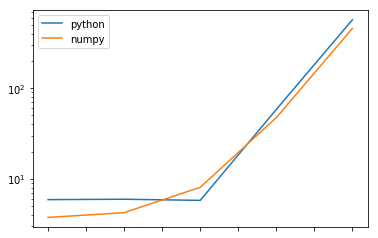

In [40]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_yscale('log')

### 5) Now do the same thing with dask

Use array sizes from 10,000 to 100,000,000 and chunk sizes from 1000 to 1,000,000. Only test combinations where chunk sizes is less than the array size.

In [4]:
import dask.array as da
da.random.random?

Signature: da.random.random(size=None, chunks=None)
Docstring:
random_sample(size=None)

Return random floats in the half-open interval [0.0, 1.0).

Results are from the "continuous uniform" distribution over the
stated interval.  To sample :math:`Unif[a, b), b > a` multiply
the output of `random_sample` by `(b-a)` and add `a`::

  (b - a) * random_sample() + a

Parameters
----------
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.

Returns
-------
out : float or ndarray of floats
    Array of random floats of shape `size` (unless ``size=None``, in which
    case a single float is returned).

Examples
--------
>>> np.random.random_sample()  # doctest: +SKIP
0.47108547995356098
>>> type(np.random.random_sample())  # doctest: +SKIP
<type 'float'>
>>> np.random.random_sample((5,))  # doctest: +SKIP
array([ 0.30220482,  0.86820401,  0

In [1]:
import dask.array as da

shape = (10000,1000000000)
for size in shape:
    rand_np = da.random.random(shape,1)
    rand_np

chunk_shape = (1000,1000000)
#ones = da.random.random(rand_np, chunks=chunk_shape)
#ones

SyntaxError: invalid syntax (<ipython-input-1-9b6ad323f822>, line 5)

### (Extra) Play around with this dataset

In [ ]:
import intake
catalog_url = 'https://github.com/pangeo-data/pangeo/raw/master/gce/catalog.yaml'
ds = intake.Catalog(catalog_url).newmann_zarr.to_dask()
ds